### 기본 세팅

고객 대출등급 예측 AI 알고리즘 개발

In [16]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

test_df = pd.read_csv("./data/test.csv")
train_df = pd.read_csv("./data/train.csv")

In [17]:
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

### EDA

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [19]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [20]:
drop_col = ['ID'] #삭제
int_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'] #숫자형
#다른 변경 필요 : '대출기간', '근로기간', 
str_col = ['주택소유상태', '대출목적'] #문자형
y_col = ['대출등급'] #y값

In [21]:
train_df['대출기간'].unique() #[' 36 months', ' 60 months']
train_df['근로기간'].unique() # <1 < 1 이있고 10+ 10 +가 있어서 합치는 게 필요함
train_df['주택소유상태'].unique() #['RENT', 'MORTGAGE', 'OWN', 'ANY']
train_df['대출목적'].unique() # ['부채 통합', '주택 개선', '주요 구매', '휴가', '의료', '자동차', '신용 카드', '소규모 사업', '기타', '이사', '주택', '재생 에너지']

array(['부채 통합', '주택 개선', '주요 구매', '휴가', '의료', '자동차', '신용 카드', '소규모 사업',
       '기타', '이사', '주택', '재생 에너지'], dtype=object)

### 수치형 데이터 분석

In [22]:
train_df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


<Axes: ylabel='총연체금액'>

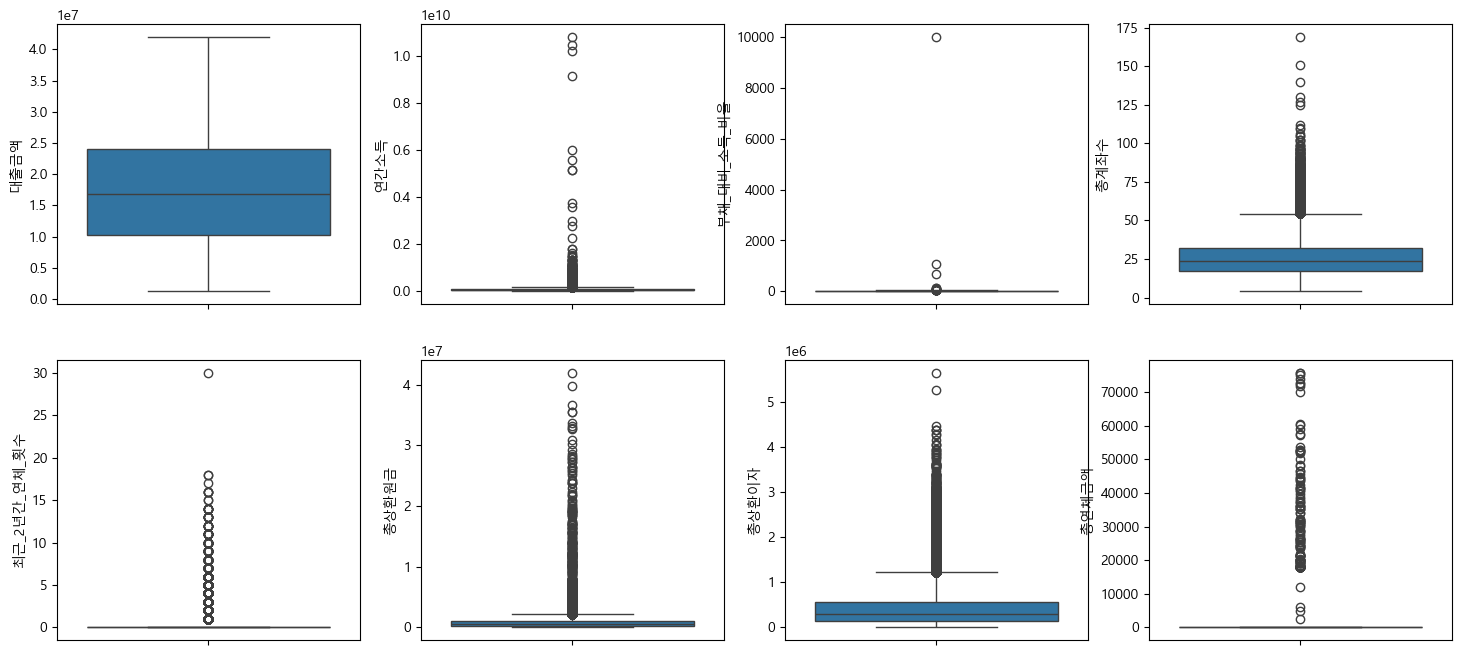

In [23]:
#############이상치 체크#################
fig, axes = plt.subplots(2, 4, figsize = (18, 8))

sns.boxplot(train_df['대출금액'], ax=axes[0, 0])
sns.boxplot(train_df['연간소득'], ax=axes[0, 1])
sns.boxplot(train_df['부채_대비_소득_비율'], ax=axes[0, 2])
sns.boxplot(train_df['총계좌수'], ax=axes[0, 3])
sns.boxplot(train_df['최근_2년간_연체_횟수'], ax=axes[1, 0])
sns.boxplot(train_df['총상환원금'], ax=axes[1, 1])
sns.boxplot(train_df['총상환이자'], ax=axes[1, 2])
sns.boxplot(train_df['총연체금액'], ax=axes[1, 3])

#예외인 값들이 정말 많다.

<Axes: ylabel='연체계좌수'>

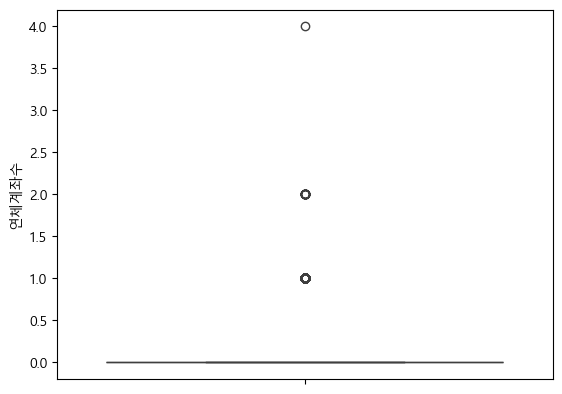

In [24]:
sns.boxplot(train_df['연체계좌수'])

In [25]:
##########대출등급과 수치형으로 비교할 수 있는 EDA 함수##########3

def drawing_eda(df, col, compare_col, order=None):
    f, ax = plt.subplots(1, 3, figsize = (20,5))
    sns.histplot(df, x=col,  ax=ax[0])
    ax[0].set_title(f'{col} 분포(histplot)')
    # ax[0].tick_params(axis='x', rotation=45)

    sns.boxplot(y=df[col], ax=ax[1])
    ax[1].set_title(f'{col} 분포(boxplot)')

    sns.boxplot(y=df[col], x=df[compare_col], order=order, ax=ax[2])
    ax[2].set_title(f'{col} vs {compare_col}')
   
    plt.subplots_adjust(hspace = 0.5)
    plt.show()

In [26]:
sorted(set(train_df['대출등급'].values))
sorted(train_df['대출등급'].unique()) #order 순서 잡기

['A', 'B', 'C', 'D', 'E', 'F', 'G']

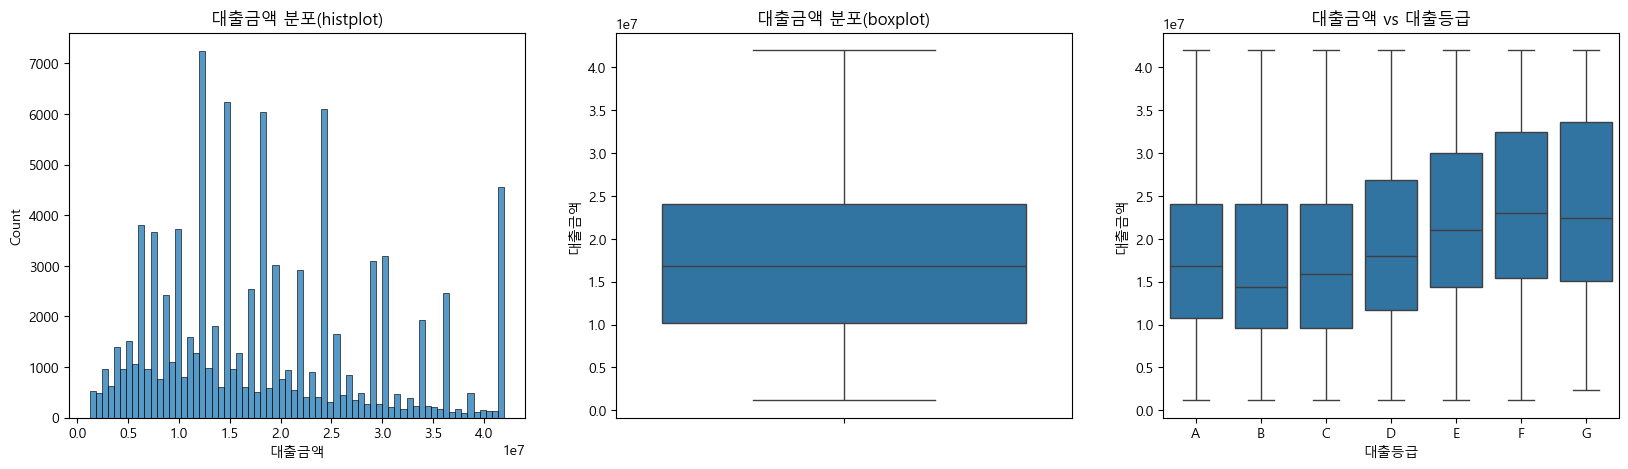

In [27]:
###############대출금액##############
drawing_eda(train_df,'대출금액', '대출등급', order = sorted(train_df['대출등급'].unique()))

### 등급이 낮아질 수 록 대출 금액이 높아짐, 이상치는 보이지 않음

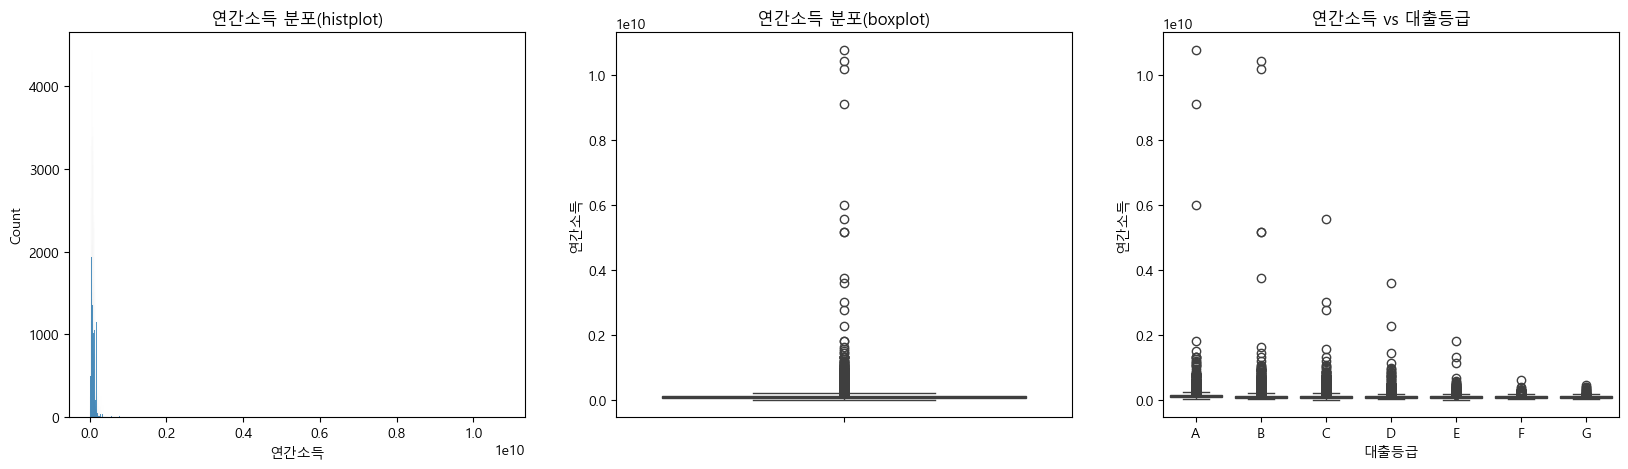

In [28]:
###############연간소득##############
#연간소득과 대출등급
drawing_eda(train_df,'연간소득', '대출등급', order = sorted(train_df['대출등급'].unique()))

In [29]:
#가장 빈번한 값
train_df['연간소득'].value_counts()[0] #72000000

#가장 큰 값
train_df['연간소득'].max() #10800000000

#가장 작은 값
train_df['연간소득'].min() #0


0

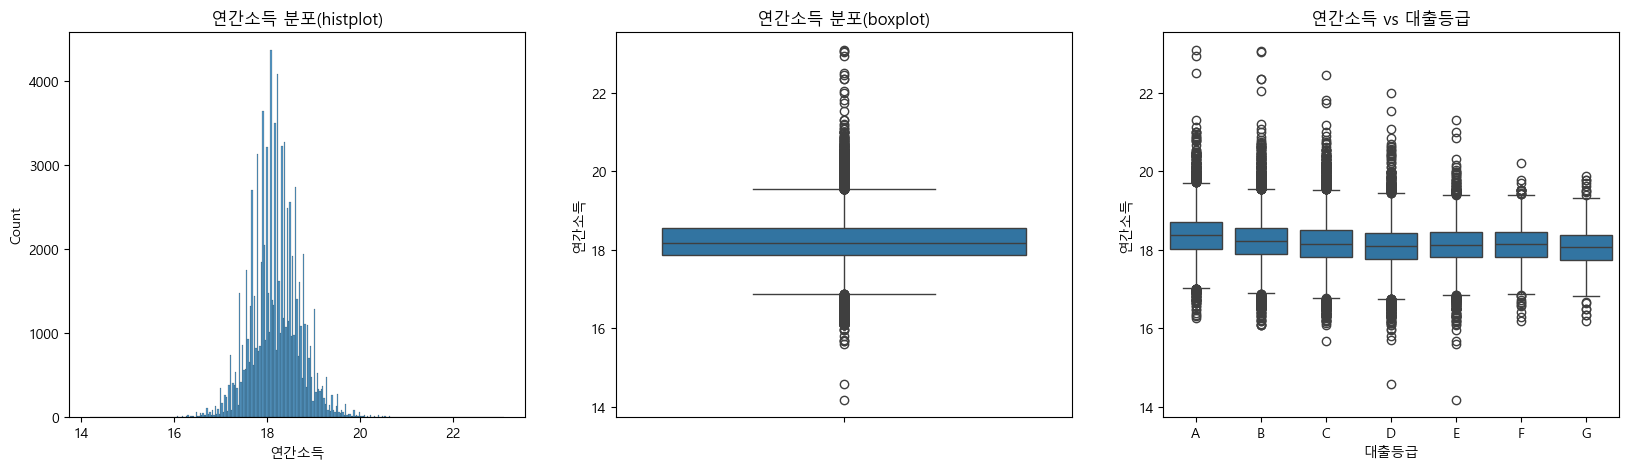

In [30]:
#log 처리
train_log = train_df.copy()
train_log.drop(train_log[train_log['연간소득'] == 0].index) 
train_log.drop(index = train_log[train_log['연간소득'] == 0].index, inplace=True)
train_log['연간소득'] = train_log['연간소득'].map(lambda i : np.log(i) if i > 0 else 0)

drawing_eda(train_log, '연간소득', '대출등급', order=sorted(train_df['대출등급'].unique()))

In [31]:
# 분석 : A, B, C 등급은 다른 등급 대비 연산소득이 높다.

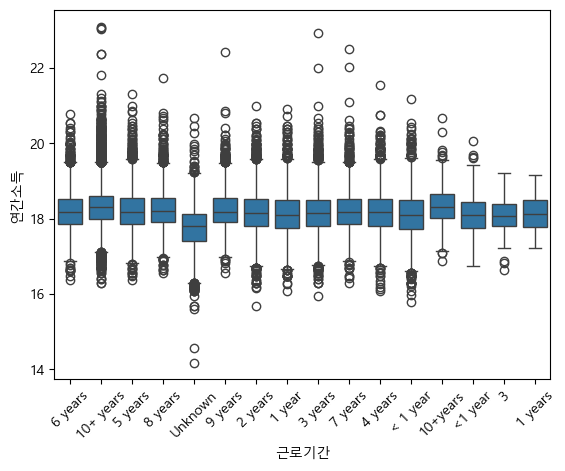

In [32]:
#근로기간과 연간소득은 서로 영향이 있을까?
sns.boxplot(y=train_log['연간소득'], x=train_log['근로기간']) #이 그래프에서도 동일하게 값이 한쪽으로 몰렸기 때문에 log를 취한 데이터프레임을 이용용
plt.xticks(rotation=45)
plt.show()

#unknown 값이 월등이 작고 10년 이상 근로한 경우 대비 값이 높은 것을 확인

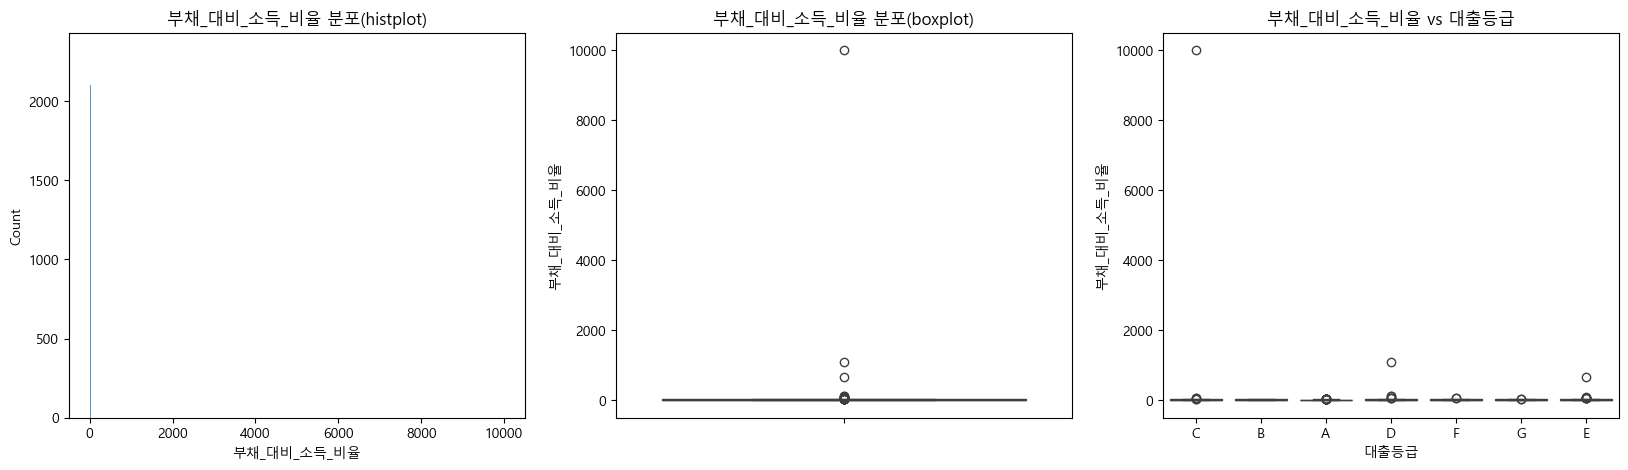

In [33]:
##########부채대비소득비율#########
drawing_eda(train_df,'부채_대비_소득_비율', '대출등급')

In [34]:
train_df['부채_대비_소득_비율'].describe()

count    96294.000000
mean        19.379590
std         33.569559
min          0.000000
25%         12.650000
50%         18.740000
75%         25.540000
max       9999.000000
Name: 부채_대비_소득_비율, dtype: float64

In [35]:
train_df['부채_대비_소득_비율'].quantile(0.99) #38.41
train_df[train_df['부채_대비_소득_비율'] >= 200].count() #200이상 삭제

ID              3
대출금액            3
대출기간            3
근로기간            3
주택소유상태          3
연간소득            3
부채_대비_소득_비율     3
총계좌수            3
대출목적            3
최근_2년간_연체_횟수    3
총상환원금           3
총상환이자           3
총연체금액           3
연체계좌수           3
대출등급            3
dtype: int64

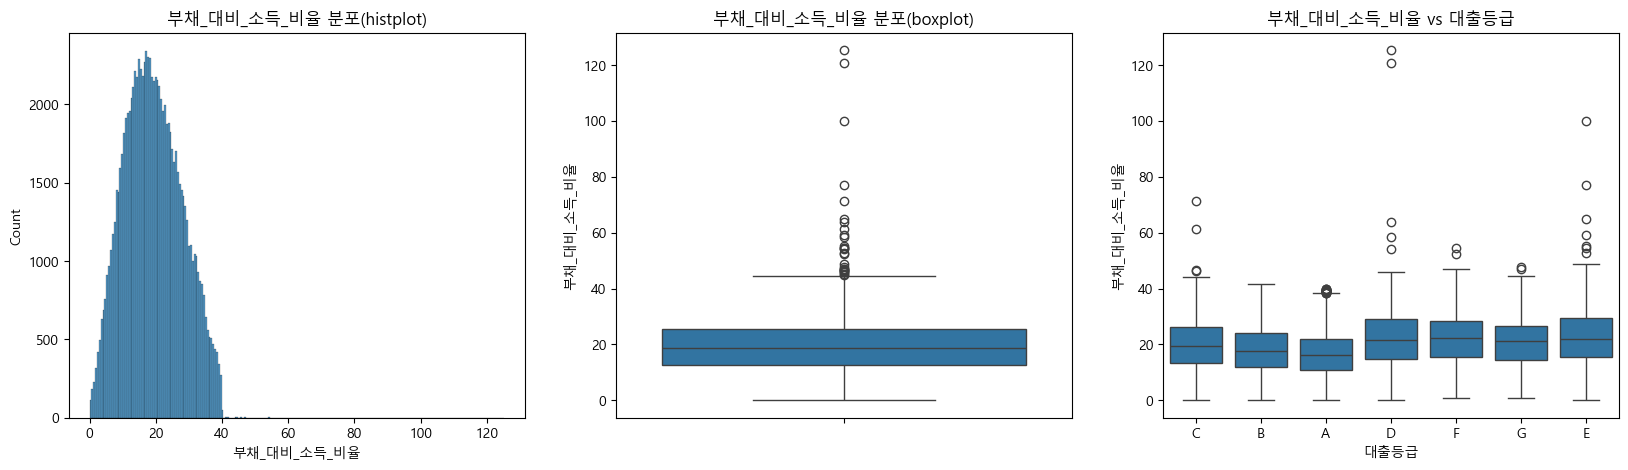

In [36]:
train_drop = train_df.copy()
train_drop = train_drop.drop(train_drop[train_drop['부채_대비_소득_비율'] >= 200].index)
drawing_eda(train_drop, '부채_대비_소득_비율', '대출등급')

In [37]:
###########최근 2년간 연체 횟수#########
train_df['최근_2년간_연체_횟수'].value_counts() /train_df['최근_2년간_연체_횟수'].count()
#대부분 연체횟수가 0 아니면 1에 속함

0     0.793320
1     0.135824
2     0.040459
3     0.014850
4     0.007238
5     0.003510
6     0.001849
7     0.000893
8     0.000696
9     0.000415
10    0.000363
11    0.000218
12    0.000093
14    0.000083
13    0.000083
16    0.000042
18    0.000021
15    0.000021
17    0.000010
30    0.000010
Name: 최근_2년간_연체_횟수, dtype: float64

In [38]:
train_df.groupby('대출등급')['최근_2년간_연체_횟수'].agg(['mean'])
#대출등급이 높을 수록 평균 연체횟수가 낮음

,mean
대출등급,
A,0.218698
B,0.365409
C,0.380299
D,0.384379
E,0.349334
F,0.361822
G,0.416667


In [39]:
train_df['총상환원금'].describe()

count    9.629400e+04
mean     8.225035e+05
std      1.027745e+06
min      0.000000e+00
25%      3.075720e+05
50%      5.976960e+05
75%      1.055076e+06
max      4.195594e+07
Name: 총상환원금, dtype: float64

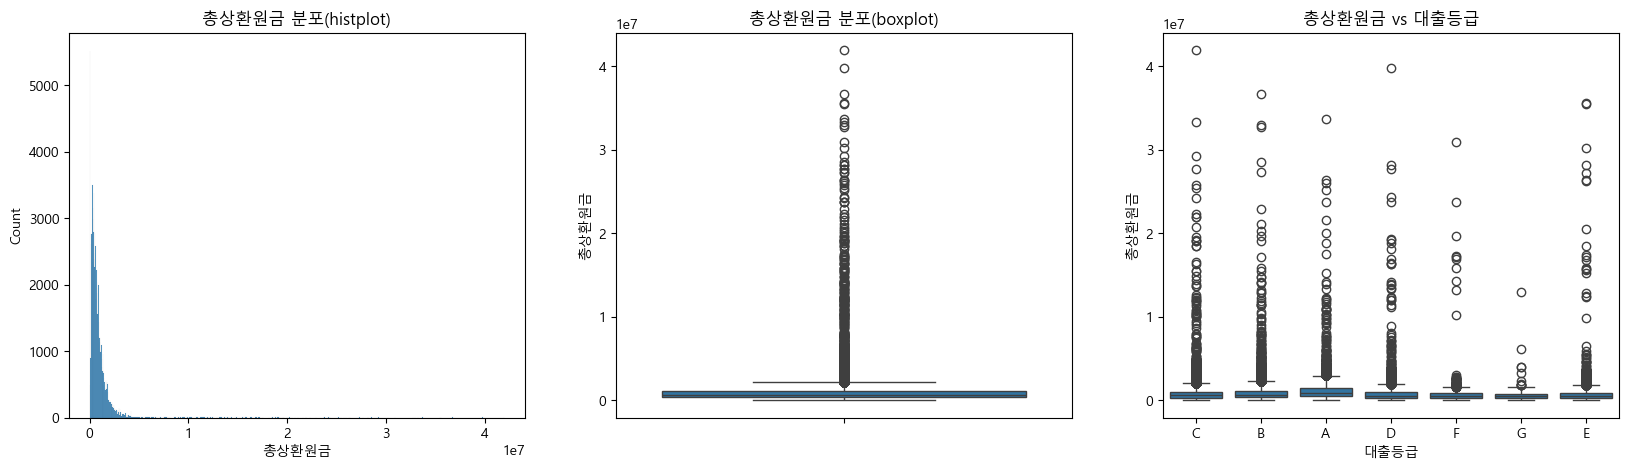

In [40]:
drawing_eda(train_df, '총상환원금', '대출등급')

              mean    median
대출등급                        
A     1.066966e+06  830280.0
B     8.340144e+05  606564.0
C     7.521078e+05  552132.0
D     7.297173e+05  528600.0
E     7.074507e+05  523908.0
F     6.673177e+05  490224.0
G     5.870190e+05  442188.0


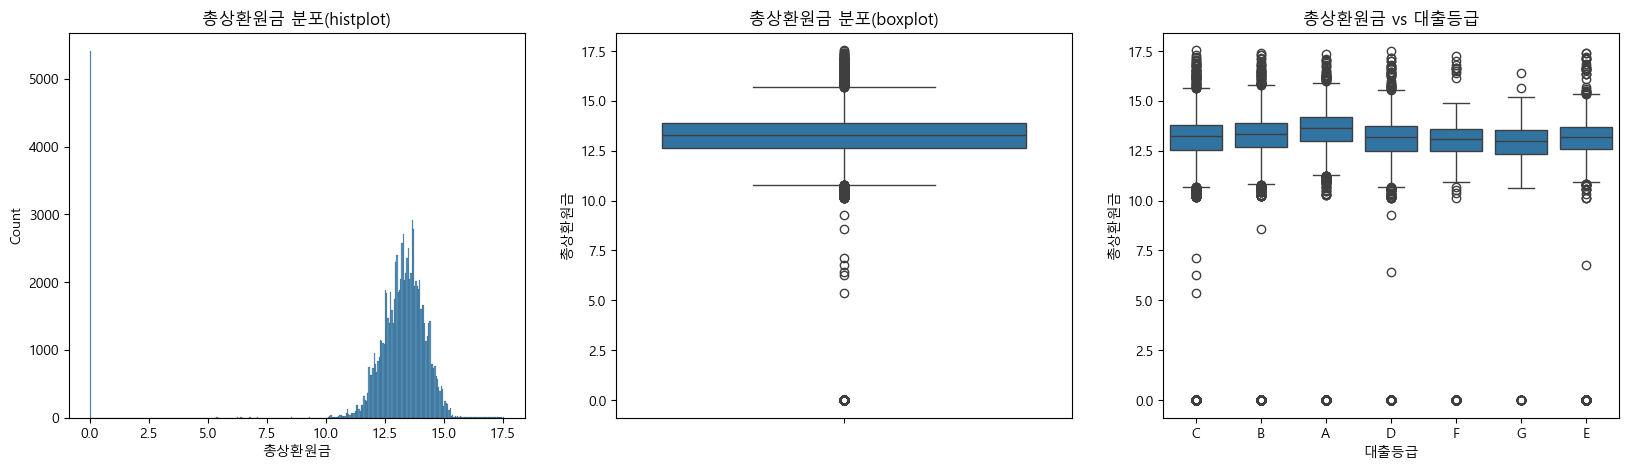

In [41]:
# 대출등급에 따른 총상환원금 평균값, 중앙값p
print(train_df.groupby('대출등급')['총상환원금'].agg(['mean','median']))

#log 처리
train_log = train_df.copy()
train_log['총상환원금'] = train_log['총상환원금'].map(lambda i : np.log(i) if i > 0 else 0)

drawing_eda(train_log, '총상환원금', '대출등급')

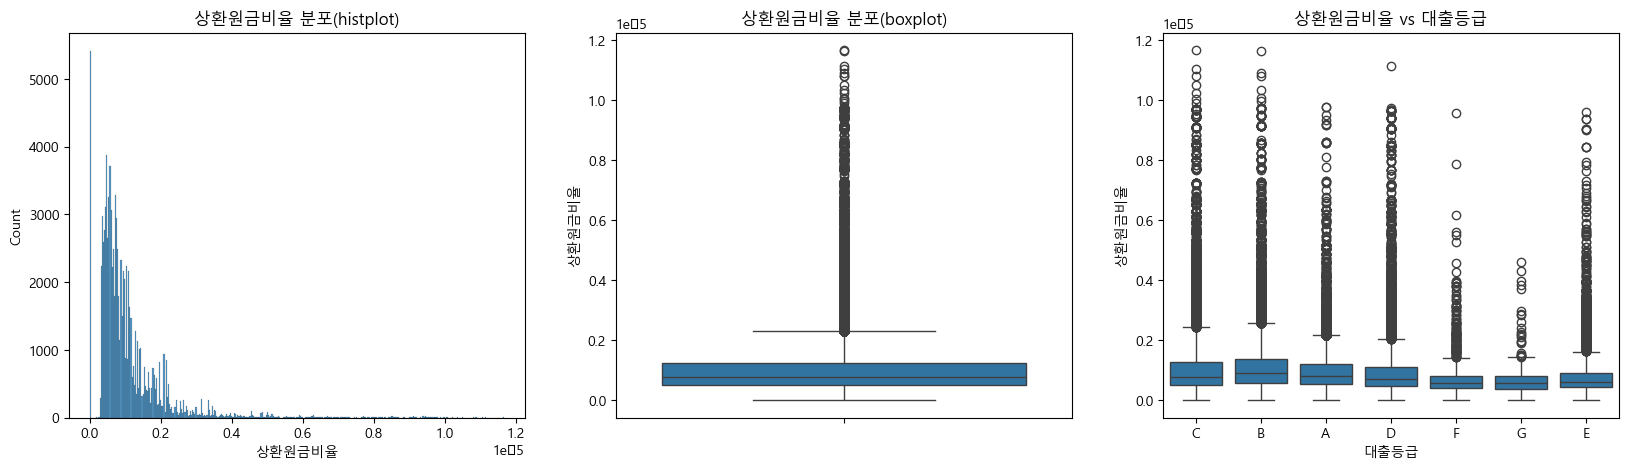

In [42]:
# 총상환원금 비율 plot
train_log['상환원금비율'] = train_log['총상환원금']/train_log['대출금액']

drawing_eda(train_log, '상환원금비율', '대출등급')

In [43]:
train_log.groupby('대출등급')['상환원금비율'].agg(['mean','median']) #비율이 증가할수록 대출등급이 상승하는 경향을 보임

,mean,median
대출등급,,
A,9.864648e-07,8.000849e-07
B,1.100931e-06,8.838595e-07
C,1.107363e-06,7.790308e-07
D,1.033507e-06,7.139862e-07
E,7.939527e-07,6.088494e-07
F,6.900748e-07,5.522764e-07
G,6.734800e-07,5.689190e-07


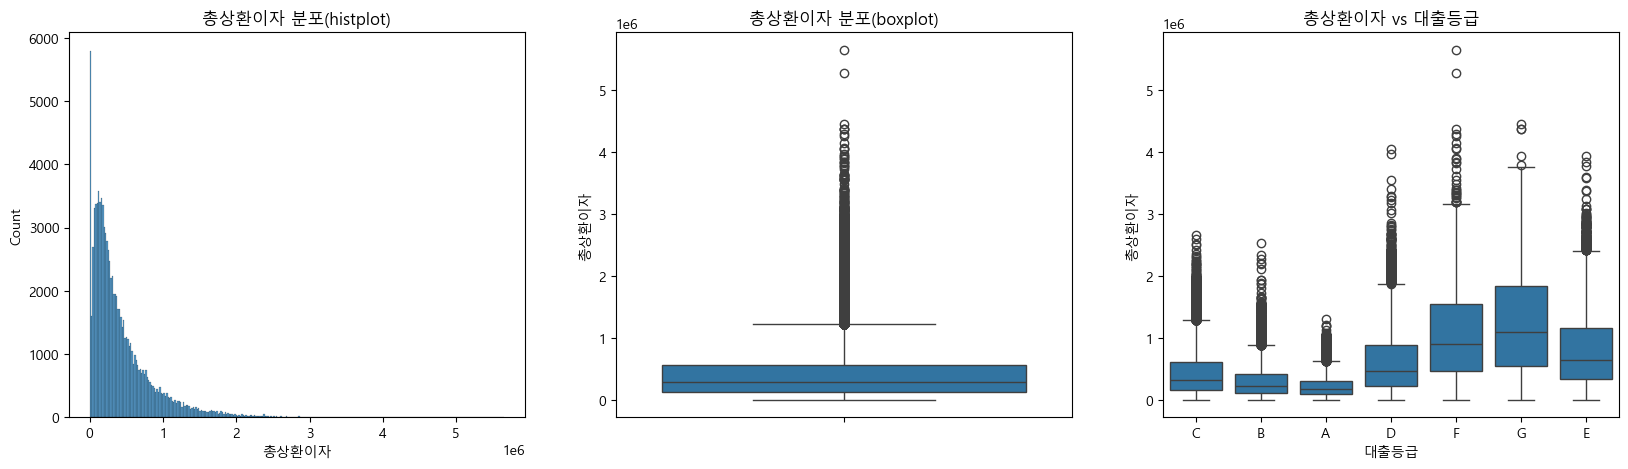

In [44]:
#########총상황이자#########
drawing_eda(train_df, '총상환이자', '대출등급')

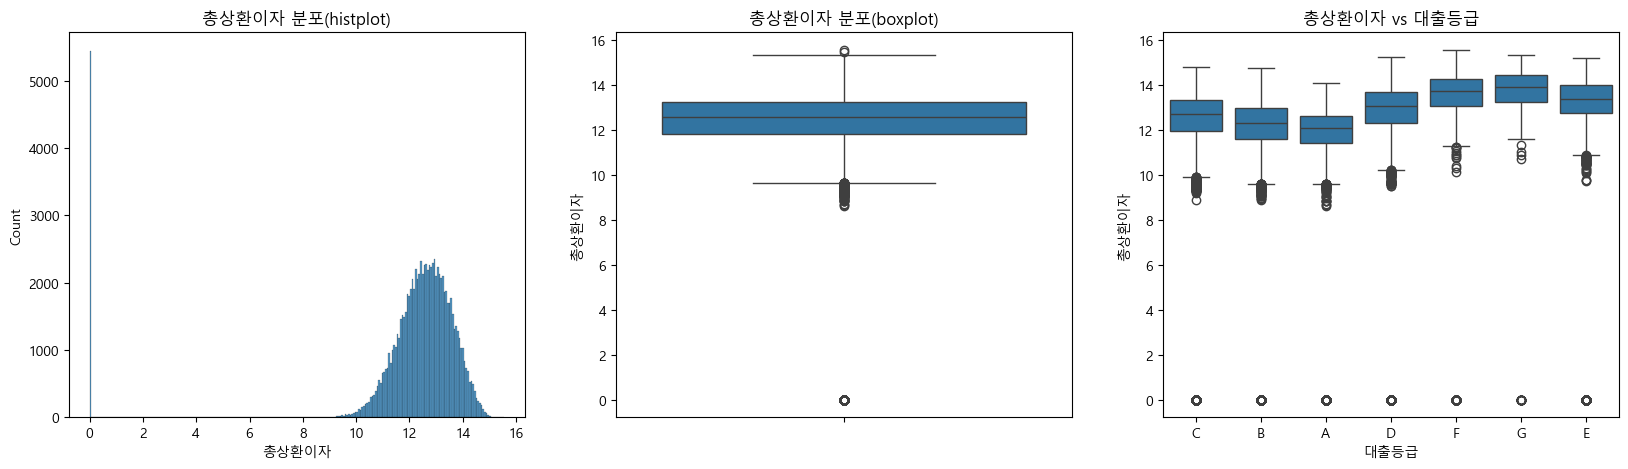

In [45]:
train_log['총상환이자'] = train_log['총상환이자'].map(lambda x: np.log(x) if x >0 else 0)
drawing_eda(train_log, '총상환이자', '대출등급')

### 범주형 데이터 분석

In [46]:
sorted(train_df['근로기간'].unique())

['1 year',
 '1 years',
 '10+ years',
 '10+years',
 '2 years',
 '3',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 '<1 year',
 'Unknown']

Text(0.5, 1.0, 'PiePlot')

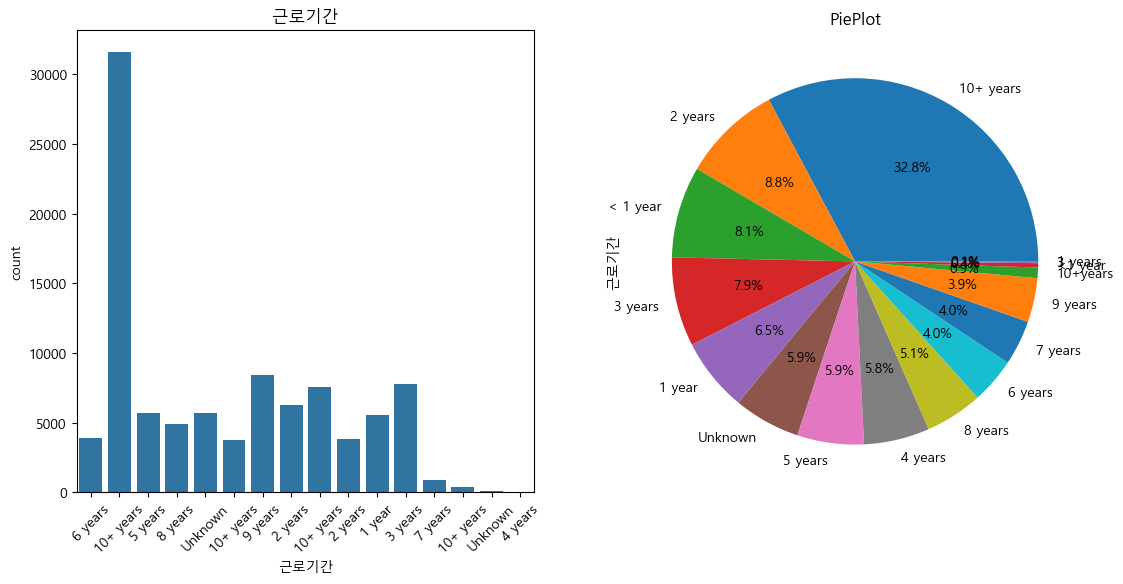

In [47]:
###############근로기간##############
f, ax = plt.subplots(1,2, figsize = (13,6))
sns.countplot(x='근로기간', data=train_df, ax = ax[0])
ax[0].set_title('근로기간')
ax[0].set_xlabel('근로기간')
ax[0].set_xticklabels(train_df['근로기간'],rotation=45)

train_df['근로기간'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('PiePlot')

# 10년 이상이 월등히 많으며 단어 통일이 필요하다. 근로기간이 대출등급에 유의미한 영향을 미칠까?

<Axes: xlabel='대출기간', ylabel='count'>

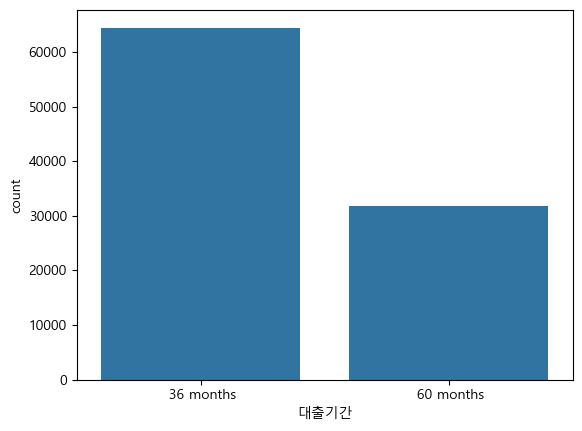

In [48]:
###############근로기간##############
sns.countplot(train_df, x='대출기간')

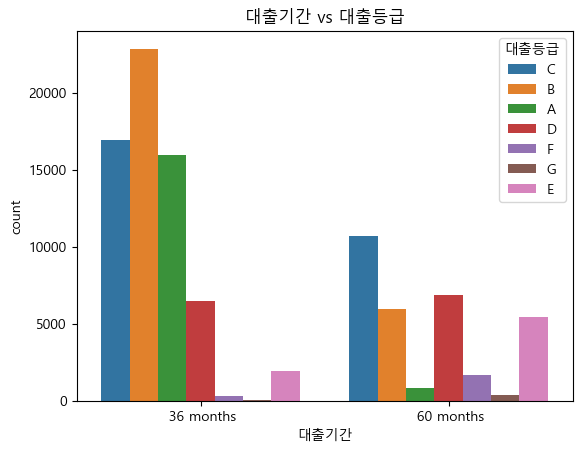

In [49]:
sns.countplot(data=train_df, x='대출기간', hue = '대출등급')
plt.title('대출기간 vs 대출등급')
plt.xlabel('대출기간')
plt.show()

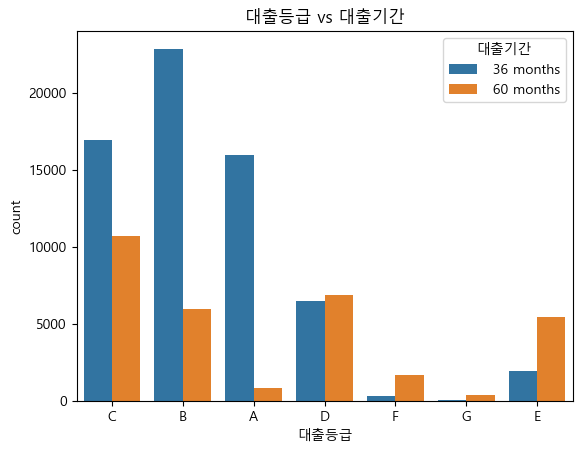

In [50]:
sns.countplot(data = train_df, x='대출등급', hue = '대출기간')
plt.title('대출등급 vs 대출기간')
plt.xlabel('대출등급')
plt.show()

In [51]:
#대출기간 36개월이 60개월보다 약 2배 많으며, 
# 높은 등급일 수록 36개월, 낮은 등급일 수록 60개월 비율이 더 높음

In [52]:
###############대출목적##############
train_df['대출목적'].value_counts() / train_df['대출목적'].count()

#주택개선부터 '기타'로 통합

부채 통합     0.572725
신용 카드     0.254429
주택 개선     0.063971
기타        0.049068
주요 구매     0.018724
의료        0.010790
자동차       0.008277
소규모 사업    0.008173
이사        0.005255
휴가        0.004839
주택        0.003126
재생 에너지    0.000623
Name: 대출목적, dtype: float64

In [53]:
train_df['주택소유상태'].value_counts() #any는 삭제

MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64

EDA 참고 링크 https://dacon.io/competitions/official/236214/codeshare/9676?page=2&dtype=recent

### 전처리 진행

ID : user_id 구분용
대출금액 : 총 대출금액
대출기간 : 얼마나 빌렸는가
근로기간 : 근로기간
주택소유상태 : 주택 소유 여부, 월세 등등
연간소득 : 연봉
부채 대비 소득 비율 : 말 그대로 부채 대비 소득의 비율입니다.
총계좌수 : 총 가지고 있는 은행 계좌수
대출목적 : 적혀있는 그대로 일것으로 추정됩니다.
최근 2년간 연체 횟수 : 이게 있다면 등급이 나쁠 것 같군요.
총 상환 원금 : 지금까지 갚은 원금
총 상환 이자 : 상환 이자. 근데 문제는 이자율을 알 수 없군요. 총 상환 기간을 모르니까요.
연체 금액, 연체계좌수 : 연체 관련 추가 정보들입니다.
대출 등급 : 최종 target입니다. 알파벳으로 여러개의 등급이 매겨진 것 같습니다.


In [54]:
#근로기간 전처리
def work_year_preprocessing(value):
    if value in ['< 1 year', '<1 year', '< 1 years']:
        return '0'
    elif value in ['10+years', '10+ years']:
        return '10'
    elif value == 'Unknown':
        return '0'
    else:
        return str(value[0]) 
    
#unknown을 선형회귀로 예측해서 작성하는 방법도 있었음

In [55]:
def preprocessing_num(train, test):
    ################  train 전처리   ################
    train = train.drop(columns = ['ID'])
    train['근로기간'] = train['근로기간'].apply(lambda x : int(work_year_preprocessing(x)))

    # le = LabelEncoder()
    # train['대출등급'] = le.fit_transform(train['대출등급'])
    train['대출등급'] = train['대출등급'].replace('A',6)
    train['대출등급'] = train['대출등급'].replace('B',5)
    train['대출등급'] = train['대출등급'].replace('C',4)
    train['대출등급'] = train['대출등급'].replace('D',3)
    train['대출등급'] = train['대출등급'].replace('E',2)
    train['대출등급'] = train['대출등급'].replace('F',1)
    train['대출등급'] = train['대출등급'].replace('G',0)

    train['대출기간'] = train['대출기간'].apply(lambda row: 0 if row == ' 36 months' else 1)
    train['최근_2년간_연체_여부'] = train['최근_2년간_연체_횟수'].apply(lambda x: 1 if x > 0 else 0)
    train.drop(columns='최근_2년간_연체_횟수', inplace=True)

    ################  test 전처리   ################
    test = test.drop(columns = ['ID'])
    test['근로기간'] = test['근로기간'].apply(lambda x : int(work_year_preprocessing(x)))

    test['대출기간'] = test['대출기간'].apply(lambda row: 0 if row == ' 36 months' else 1)
    test['최근_2년간_연체_여부'] = test['최근_2년간_연체_횟수'].apply(lambda x: 1 if x > 0 else 0)
    test.drop(columns='최근_2년간_연체_횟수', inplace=True)

    return train, test


In [56]:
def preprocessing_str(train, test):
    ################  train 전처리   ################
    train.drop(index = train[train['주택소유상태'] == 'ANY'].index, inplace=True)
    train = pd.get_dummies(train, columns = ['주택소유상태'])
    train.drop(columns = '주택소유상태_OWN', inplace = True) #차원수 감소를 위해 삭제

    train['대출목적'] = train['대출목적'].apply(lambda x : '기타' if x not in ['부채 통합', '신용 카드'] else x)
    train = pd.get_dummies(train, columns = ['대출목적'])

    ################  test 전처리   ################
    test.drop(index = test[test['주택소유상태'] == 'ANY'].index, inplace=True)
    test = pd.get_dummies(test, columns = ['주택소유상태'])
    test.drop(columns = '주택소유상태_OWN', inplace = True) #차원수 감소를 위해 삭제

    test['대출목적'] = test['대출목적'].apply(lambda x : '기타' if x not in ['부채 통합', '신용 카드'] else x)
    test = pd.get_dummies(test, columns = ['대출목적'])

    return train, test

In [57]:
train, test = preprocessing_num(train_df, test_df)
train, test = preprocessing_str(train, test)

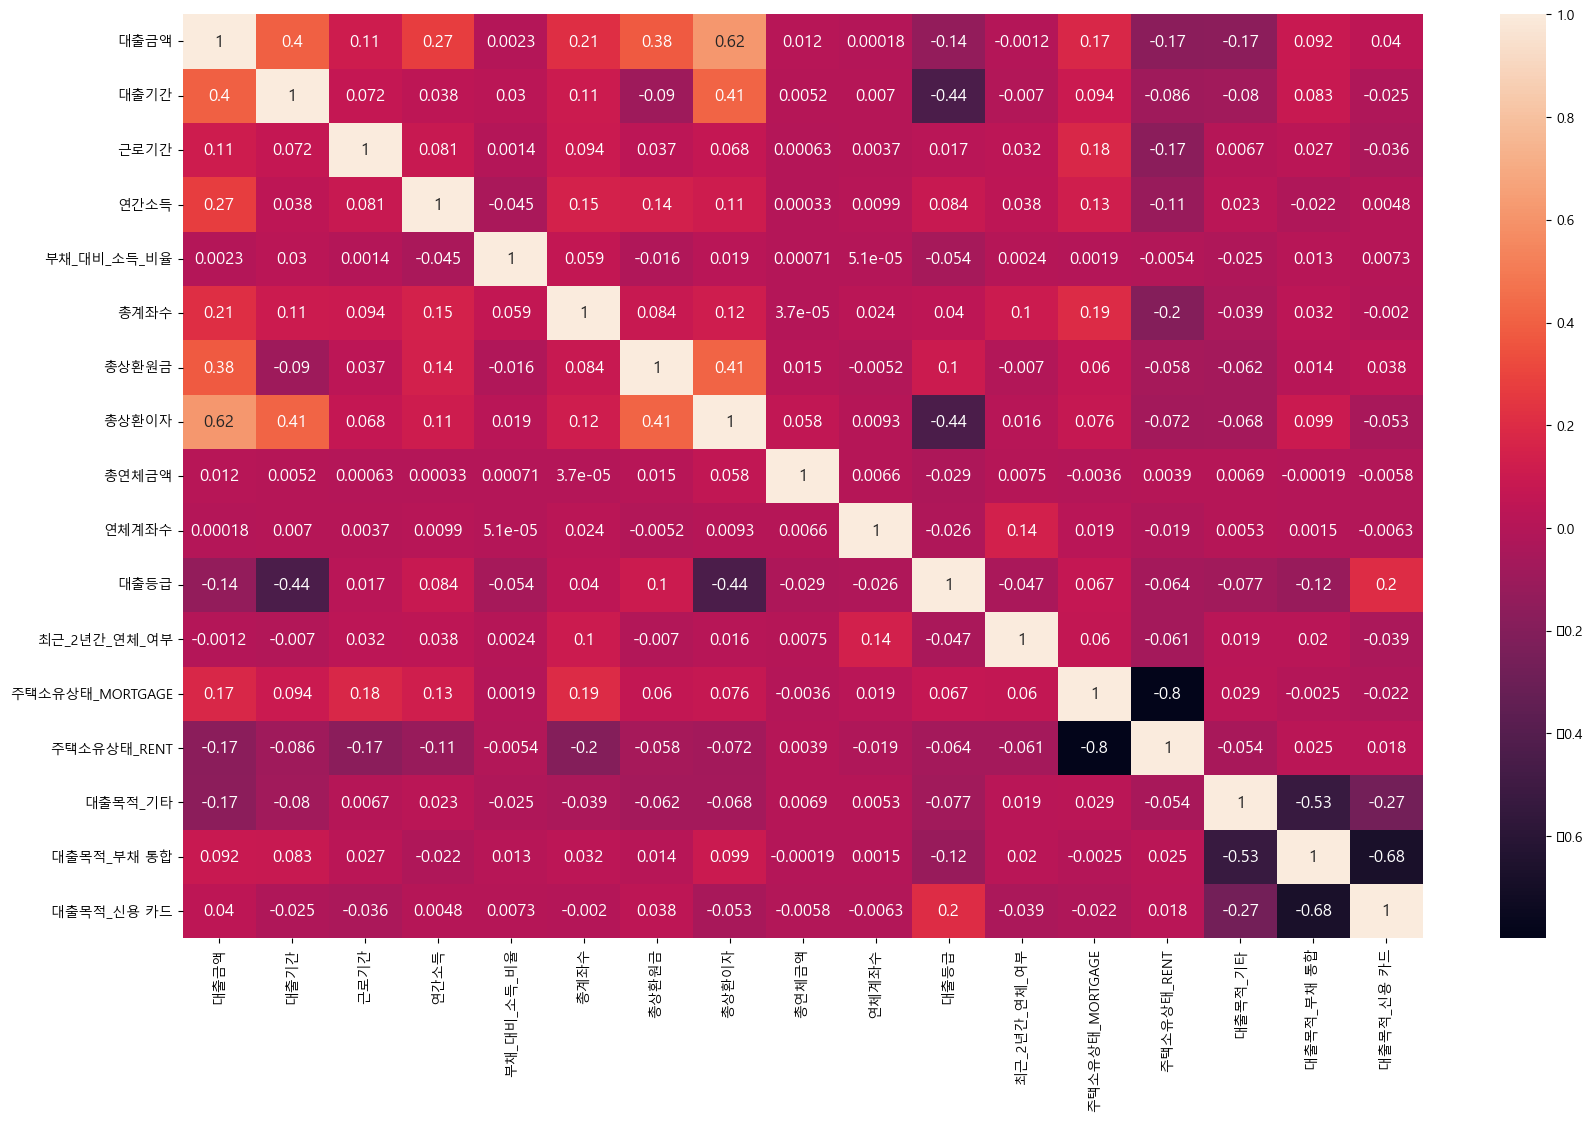

In [58]:
plt.rcParams["figure.figsize"] = (20,12)
sns.heatmap(train.corr(), annot=True, annot_kws = {'size':12})
plt.show()

### 모델링

In [59]:
train.columns

Index(['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '총상환원금', '총상환이자',
       '총연체금액', '연체계좌수', '대출등급', '최근_2년간_연체_여부', '주택소유상태_MORTGAGE',
       '주택소유상태_RENT', '대출목적_기타', '대출목적_부채 통합', '대출목적_신용 카드'],
      dtype='object')

In [60]:
y = train['대출등급']
x = train.drop(columns = '대출등급')

In [61]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

xtr, xval, ytr, yval = train_test_split(x, y, test_size=0.2, random_state=123)

In [62]:
model = XGBClassifier()
model.fit(xtr, ytr)
yval_pred = model.predict(xval)

#분류모델 성능 예측
print(f'정확도 : {accuracy_score(yval, yval_pred)}')
print(f'f1_score : {f1_score(yval, yval_pred, average = "weighted")}')
print(f'혼동행렬 : {confusion_matrix(yval, yval_pred)}')
print(classification_report(yval, yval_pred))

정확도 : 0.8540422659535801
f1_score : 0.8532983878350556
혼동행렬 : [[  39   36    2    4    4    0    0]
 [   8  242   86    5   17    2    0]
 [   5   28 1073  260   60   16    0]
 [   1    5  164 2212  284   64   10]
 [   0    1   16  202 4918  386   37]
 [   0    1    1   12  407 5000  307]
 [   0    0    0    2   29  349 2964]]
              precision    recall  f1-score   support

           0       0.74      0.46      0.57        85
           1       0.77      0.67      0.72       360
           2       0.80      0.74      0.77      1442
           3       0.82      0.81      0.81      2740
           4       0.86      0.88      0.87      5560
           5       0.86      0.87      0.87      5728
           6       0.89      0.89      0.89      3344

    accuracy                           0.85     19259
   macro avg       0.82      0.76      0.79     19259
weighted avg       0.85      0.85      0.85     19259



### 모델링

In [63]:
train.columns

Index(['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '총상환원금', '총상환이자',
       '총연체금액', '연체계좌수', '대출등급', '최근_2년간_연체_여부', '주택소유상태_MORTGAGE',
       '주택소유상태_RENT', '대출목적_기타', '대출목적_부채 통합', '대출목적_신용 카드'],
      dtype='object')

In [64]:
y = train['대출등급']
x = train.drop(columns = '대출등급')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

xtr, xval, ytr, yval = train_test_split(x, y, test_size=0.2, random_state=123)

In [66]:
def modeling_train(model0, hyperparameters={}):
    model = model0(**hyperparameters)
    model.fit(xtr, ytr)
    yval_pred = model.predict(xval)

    #분류모델 성능 예측
    print(f'정확도 : {accuracy_score(yval, yval_pred)}')
    print(f'f1_score : {f1_score(yval, yval_pred, average = "weighted")}')
    print(f'혼동행렬 : {confusion_matrix(yval, yval_pred)}')
    print(classification_report(yval, yval_pred))

In [67]:
from sklearn.ensemble import RandomForestClassifier

modeling_train(RandomForestClassifier, hyperparameters={'random_state':123})

정확도 : 0.8103224466483203
f1_score : 0.8070220405120385
혼동행렬 : [[  10   48   11   10    5    1    0]
 [   2  178  126   32   18    3    1]
 [   2   10  900  424   90   14    2]
 [   1    2  143 1917  597   62   18]
 [   0    0   19  140 4886  461   54]
 [   0    0    4   20  522 4916  266]
 [   0    0    0    1   38  506 2799]]
              precision    recall  f1-score   support

           0       0.67      0.12      0.20        85
           1       0.75      0.49      0.60       360
           2       0.75      0.62      0.68      1442
           3       0.75      0.70      0.73      2740
           4       0.79      0.88      0.83      5560
           5       0.82      0.86      0.84      5728
           6       0.89      0.84      0.86      3344

    accuracy                           0.81     19259
   macro avg       0.78      0.64      0.68     19259
weighted avg       0.81      0.81      0.81     19259



In [68]:
from sklearn.tree import DecisionTreeClassifier
modeling_train(DecisionTreeClassifier)


정확도 : 0.8321823563009502
f1_score : 0.8321371728513769
혼동행렬 : [[  50   19    9    2    3    2    0]
 [  22  252   57   11   11    5    2]
 [   9   70 1035  257   47   16    8]
 [   2   14  252 2119  273   58   22]
 [   1   12   57  260 4749  412   69]
 [   0    2   16   67  406 4885  352]
 [   0    2    4   13   62  326 2937]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        85
           1       0.68      0.70      0.69       360
           2       0.72      0.72      0.72      1442
           3       0.78      0.77      0.77      2740
           4       0.86      0.85      0.85      5560
           5       0.86      0.85      0.85      5728
           6       0.87      0.88      0.87      3344

    accuracy                           0.83     19259
   macro avg       0.76      0.77      0.77     19259
weighted avg       0.83      0.83      0.83     19259



In [69]:
from xgboost import XGBClassifier

modeling_train(XGBClassifier)

정확도 : 0.8540422659535801
f1_score : 0.8532983878350556
혼동행렬 : [[  39   36    2    4    4    0    0]
 [   8  242   86    5   17    2    0]
 [   5   28 1073  260   60   16    0]
 [   1    5  164 2212  284   64   10]
 [   0    1   16  202 4918  386   37]
 [   0    1    1   12  407 5000  307]
 [   0    0    0    2   29  349 2964]]
              precision    recall  f1-score   support

           0       0.74      0.46      0.57        85
           1       0.77      0.67      0.72       360
           2       0.80      0.74      0.77      1442
           3       0.82      0.81      0.81      2740
           4       0.86      0.88      0.87      5560
           5       0.86      0.87      0.87      5728
           6       0.89      0.89      0.89      3344

    accuracy                           0.85     19259
   macro avg       0.82      0.76      0.79     19259
weighted avg       0.85      0.85      0.85     19259



### 파생변수

* 신용평가지표 참고 : https://www.allcredit.co.kr/screen/sc0682112929

1. 상환이력(건수, 지속기간)  2.부채수준(상환이력)  3. 신용거래기간  4. 신용거래형태  5. 마이데이터

- EDA를 통해 총상환원금과 총상환이자가 주요한 영향을 미치는 것을 파악, 총상환원금/총상환이자 파생변수 생성
- 신용점수 평가 기준 살펴보기 (상환 능력이 중요) -> 총상환원금/대출금액 : 상환비율

연체금액의 경우 98%가 0.0이므로 진행하지 않는다. / 연체계좌수도 동일

In [70]:
train, test = preprocessing_num(train_df, test_df)
train, test = preprocessing_str(train, test)

In [71]:
#파생변수
train['총상환원금/총상환이자'] = (train['총상환원금'])/(train['총상환이자']+1)
train['상환원금비율'] = train['총상환원금']/train['대출금액']


test['총상환원금/총상환이자'] = (test['총상환원금'])/(test['총상환이자']+1)
test['상환비율'] = test['총상환원금'] / test['대출금액']

In [72]:
y = train['대출등급']
x = train.drop(columns = '대출등급')

xtr, xval, ytr, yval = train_test_split(x, y, test_size=0.2, random_state=123)

In [73]:
modeling_train(DecisionTreeClassifier)

정확도 : 0.9407030479256452
f1_score : 0.9406788937233425
혼동행렬 : [[  63   13    2    3    1    2    1]
 [   6  309   19    9   12    3    2]
 [   2   17 1357   25   19   18    4]
 [   1    6   38 2570   73   34   18]
 [   1   11   38   58 5250  159   43]
 [   0    3   26   47  125 5417  110]
 [   0    1    4   14   42  132 3151]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        85
           1       0.86      0.86      0.86       360
           2       0.91      0.94      0.93      1442
           3       0.94      0.94      0.94      2740
           4       0.95      0.94      0.95      5560
           5       0.94      0.95      0.94      5728
           6       0.95      0.94      0.94      3344

    accuracy                           0.94     19259
   macro avg       0.92      0.90      0.91     19259
weighted avg       0.94      0.94      0.94     19259



In [74]:
modeling_train(RandomForestClassifier, hyperparameters={'random_state':123})

정확도 : 0.9294875123318967
f1_score : 0.929381775888772
혼동행렬 : [[  63   12    3    4    3    0    0]
 [   5  303   24    6   18    3    1]
 [   2   14 1311   63   41   10    1]
 [   1    2   56 2510  114   47   10]
 [   0    2   13   84 5211  209   41]
 [   0    0    7   17  191 5357  156]
 [   0    0    0    1   35  162 3146]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        85
           1       0.91      0.84      0.87       360
           2       0.93      0.91      0.92      1442
           3       0.93      0.92      0.93      2740
           4       0.93      0.94      0.93      5560
           5       0.93      0.94      0.93      5728
           6       0.94      0.94      0.94      3344

    accuracy                           0.93     19259
   macro avg       0.92      0.89      0.90     19259
weighted avg       0.93      0.93      0.93     19259



In [75]:
from xgboost import XGBClassifier

modeling_train(XGBClassifier)

정확도 : 0.9436107793758762
f1_score : 0.9435186825222415
혼동행렬 : [[  61   15    2    2    5    0    0]
 [   7  303   26    4   20    0    0]
 [   3   18 1333   31   43   14    0]
 [   0    3   25 2555  108   38   11]
 [   1    1   10   45 5290  181   32]
 [   0    3    5   15  139 5454  112]
 [   0    0    0    2   26  139 3177]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        85
           1       0.88      0.84      0.86       360
           2       0.95      0.92      0.94      1442
           3       0.96      0.93      0.95      2740
           4       0.94      0.95      0.95      5560
           5       0.94      0.95      0.94      5728
           6       0.95      0.95      0.95      3344

    accuracy                           0.94     19259
   macro avg       0.92      0.90      0.91     19259
weighted avg       0.94      0.94      0.94     19259



In [76]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()
xgb_param_grid={
    'max_depth' : [7, 8],
    'learning_rate': [0.05, 0.1, 0.3],
    'random_state': [123],
    'objective': ['multi:softmax'],
    'eval_metric': ['logloss']
}

cls=GridSearchCV(model, param_grid = xgb_param_grid, scoring="f1_macro", cv = 3)
cls.fit(xtr, ytr)
print(cls.best_params_)

{'eval_metric': 'logloss', 'learning_rate': 0.05, 'max_depth': 7, 'objective': 'multi:softmax', 'random_state': 123}


In [77]:
model = XGBClassifier(max_depth = 7, learning_rate = 0.05, random_state = 42, 
                      objective = 'multi:softmax', eval_metric = 'logloss')
model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [78]:
# pip install graphviz

https://free-eunb.tistory.com/14 참고

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

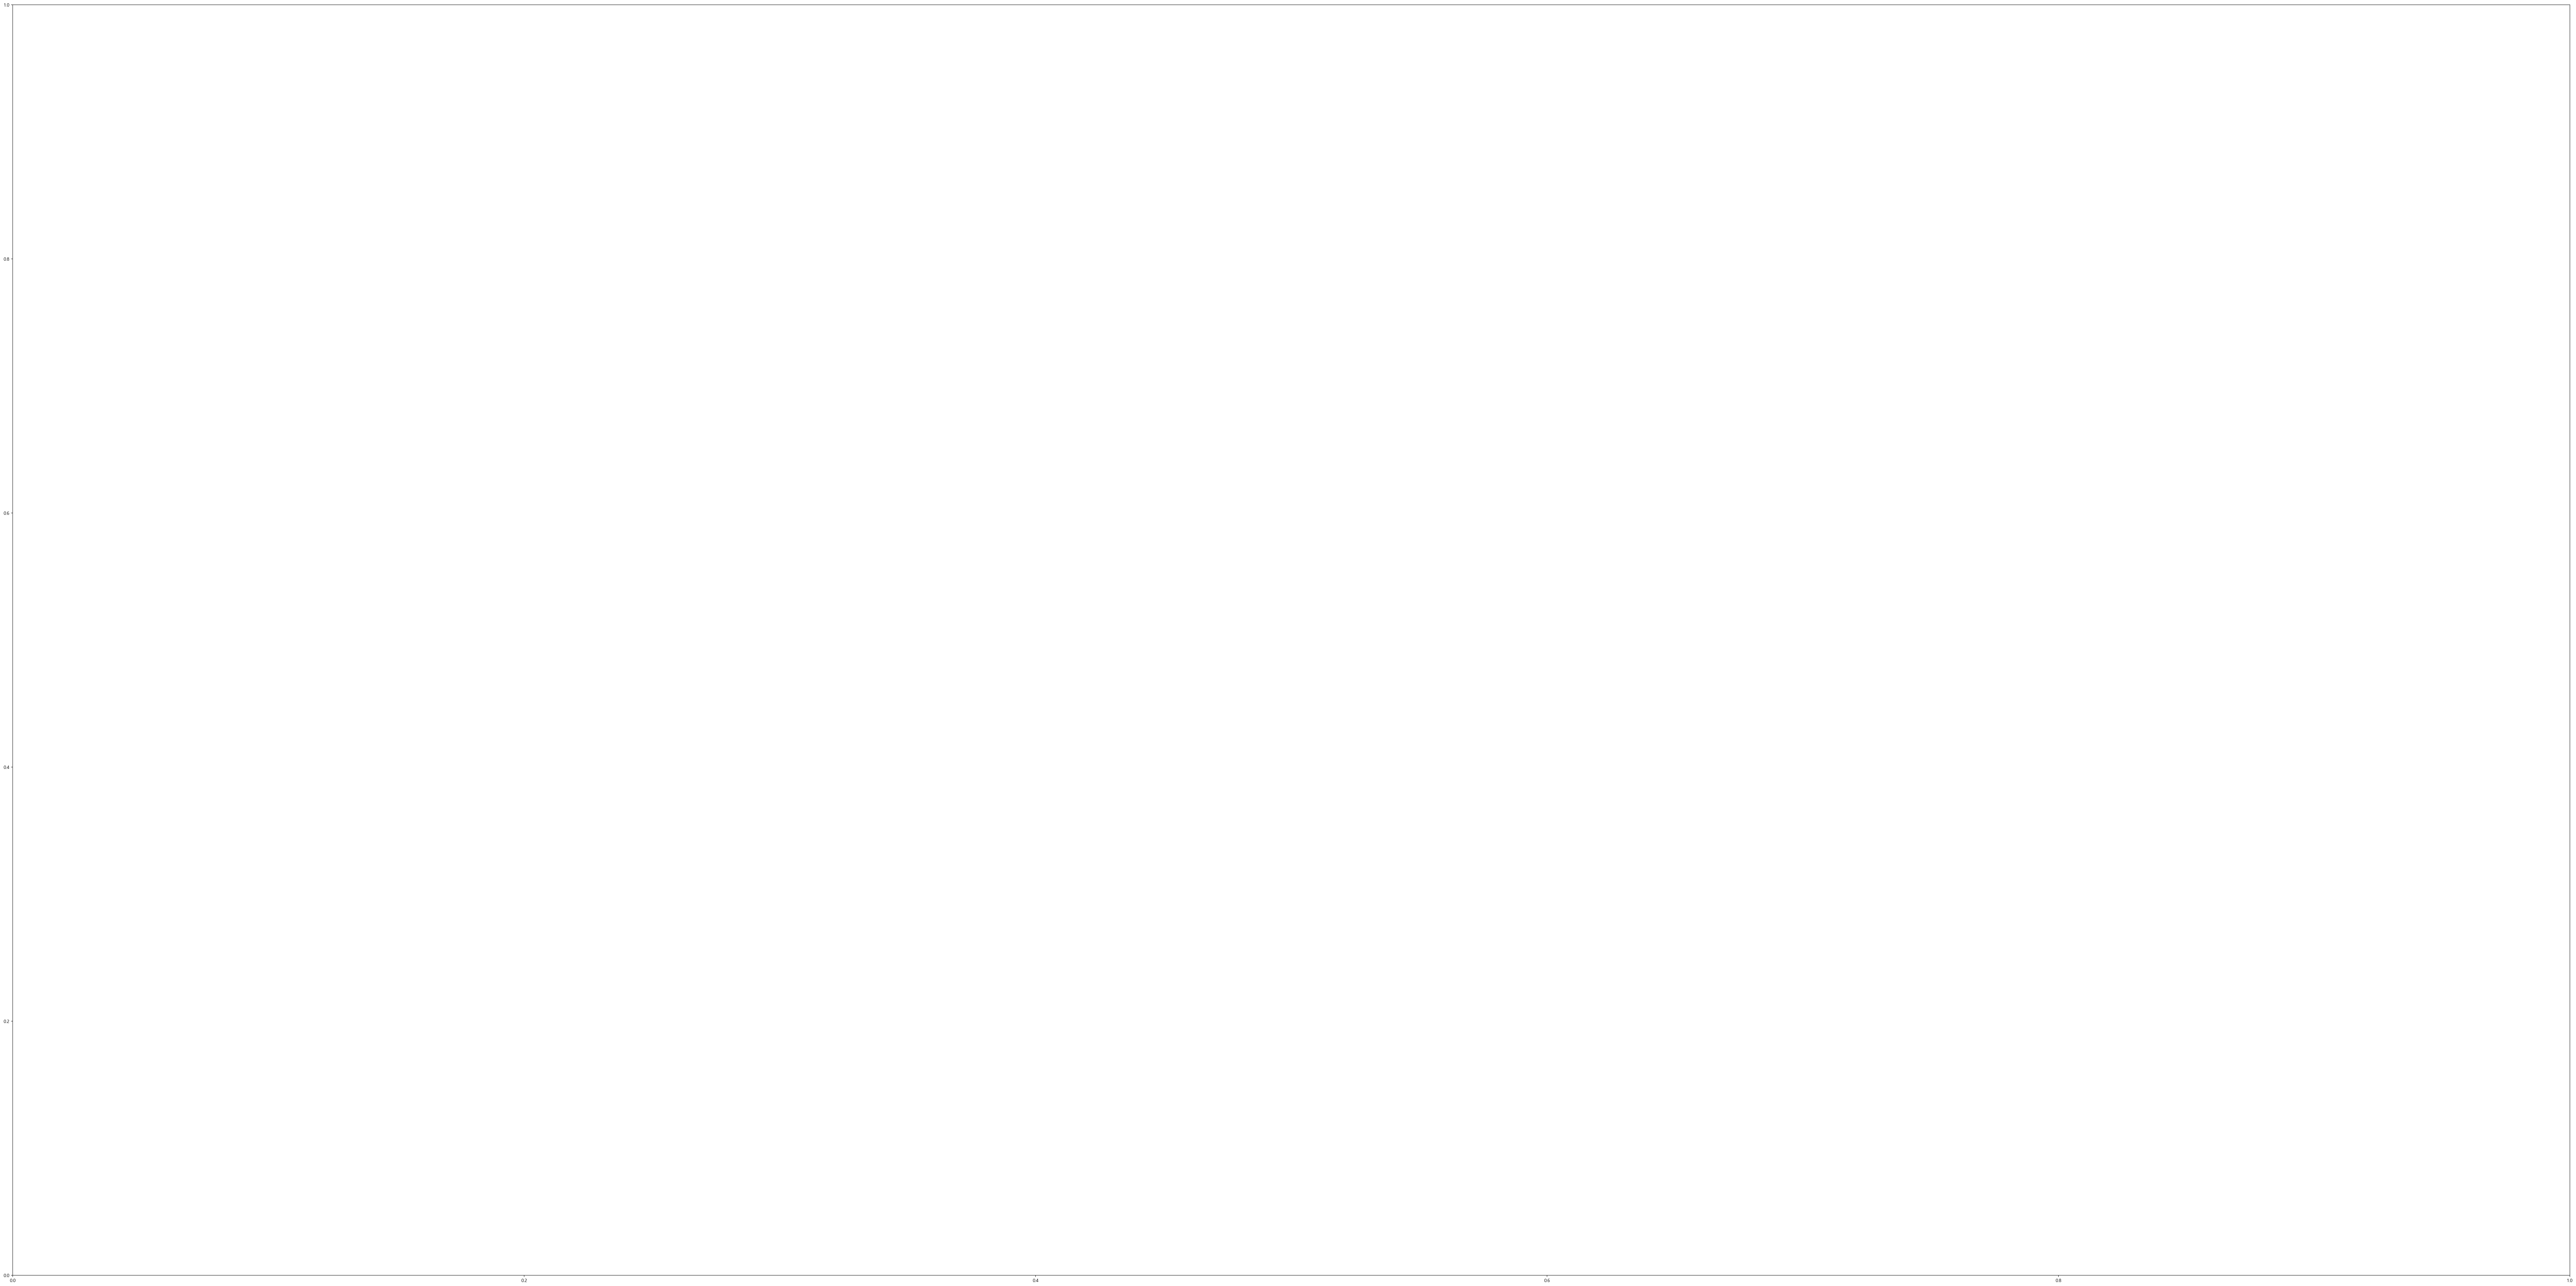

In [79]:
#xgboost 시각화
from xgboost import plot_tree
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 100, 50
plot_tree(model)
plt.show()

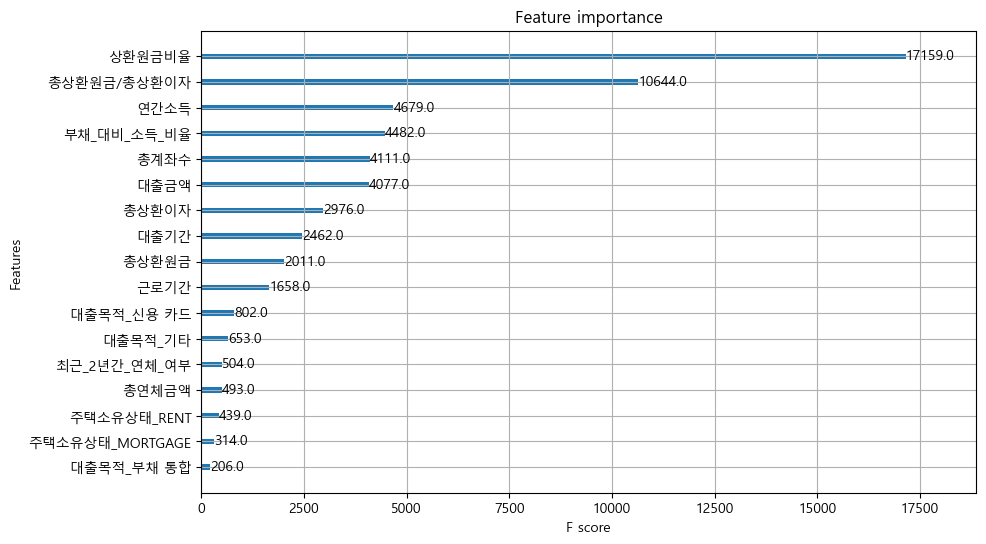

In [80]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,6)
plot_importance(model)
plt.show()

In [ ]:
어떤 걸 더 해볼 수 있을까?
- 1-2년 내 예상 수입에 따라 대출등급의 변화가 있을 수 있지 않을까?
참고 코드 : https://dacon.io/competitions/official/236214/codeshare/9671?page=1&dtype=recent


In [ ]:
########### 어떤 게 궁금해 ############
#

In [ ]:
# make_scorer 함수를 사용하여 사용자 정의 스코어 함수를 Scikit-learn의 GridSearchCV에서 사용할 수 있는 형태로 변환할 수 있습니다.